# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [11]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [4]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
dates = pd.date_range('01/01/2017', '31/03/2017')

In [14]:
# store the parameters
mu = 5
std = 2
Y_0 = 8
phi = 0.7
error = np.random.normal(0, std, len(dates))

In [39]:
# generate the time series according to the formula
ts = pd.Series(np.nan, index=dates)
y = Y_0
for i, row in enumerate(dates):
    ts[i] = mu + y * phi + error[i]
    y = ts[i] - mu

Plot the time series and verify what you see

In [46]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 12,5

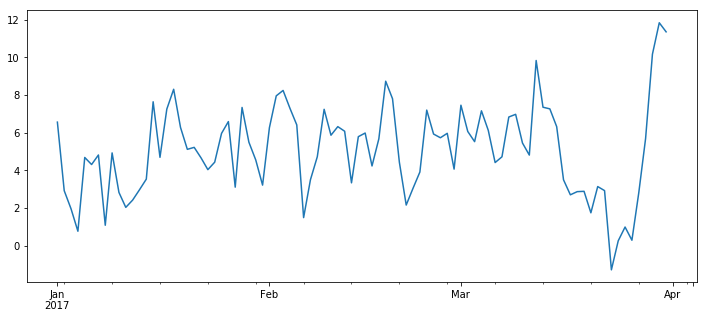

In [47]:
# plot here
ts.plot();

Looks stationary.

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

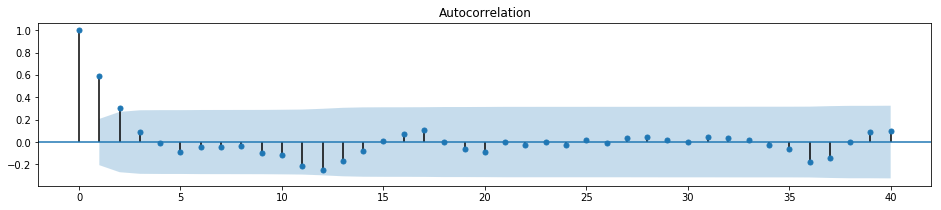

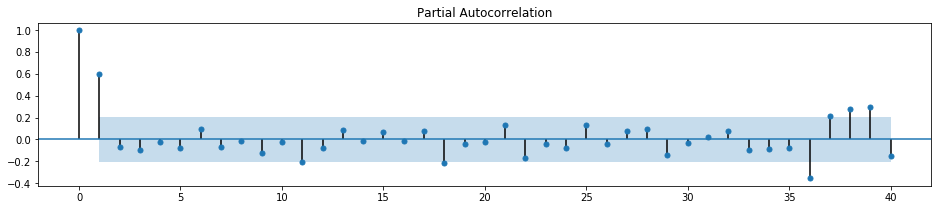

In [56]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts,ax=ax, lags=40);

Correlation for lags 1 and 2 but then tails/drops off.

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [58]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   90
Model:                     ARMA(1, 0)   Log Likelihood                -186.057
Method:                       css-mle   S.D. of innovations              1.907
Date:                Wed, 13 Mar 2019   AIC                            378.114
Time:                        13:52:37   BIC                            385.613
Sample:                    01-01-2017   HQIC                           381.138
                         - 03-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1869      0.544      9.530      0.000       4.120       6.254
ar.L1.y        0.6360      0.085      7.462      0.000       0.469       0.803
                                    Roots           

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In t

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [66]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates = pd.date_range('01/04/2015', '31/08/2015')

# store the parameters
mu = 7
theta = 0.9
std = 4
error = np.random.normal(0, std, len(dates))

ts = pd.Series(np.nan, index=dates)
error_prev = error[0]
for i, row in enumerate(dates):
    ts[i] = mu + error[i] + theta*error_prev
    error_prev = error[i]

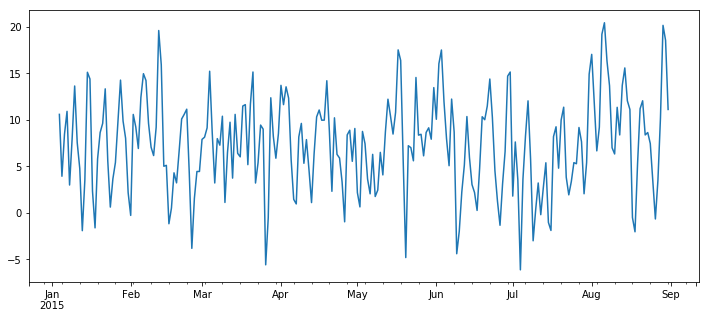

In [68]:
# Plot the time series
ts.plot();

## Look at the ACF and PACF of your model and write down your conclusions

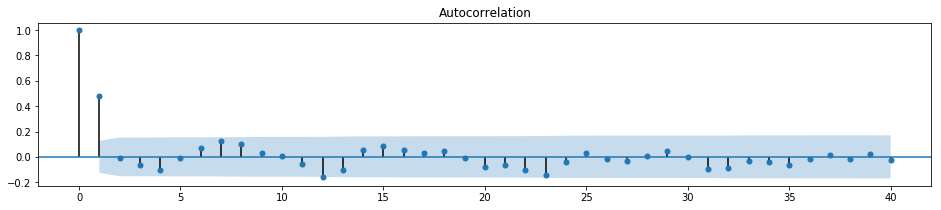

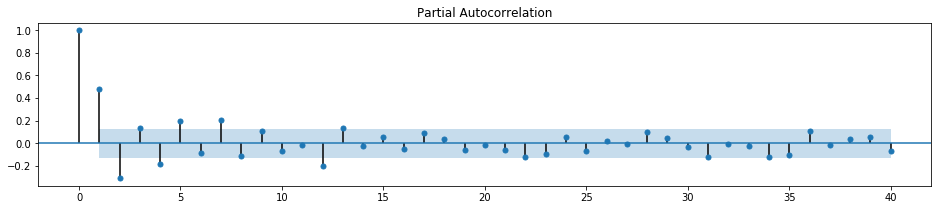

In [69]:
# plots here
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts,ax=ax, lags=40);

Maybe some seasonality/cyclical trends in the ACF?

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [70]:
# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(ts, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  240
Model:                     ARMA(1, 0)   Log Likelihood                -700.913
Method:                       css-mle   S.D. of innovations              4.486
Date:                Wed, 13 Mar 2019   AIC                           1407.825
Time:                        14:35:26   BIC                           1418.267
Sample:                    01-04-2015   HQIC                          1412.033
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3840      0.553     13.345      0.000       6.300       8.469
ar.L1.y        0.4786      0.057      8.462      0.000       0.368       0.589
                                    Roots           

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In t

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [78]:
# the data is in "winning_400m.csv"
data = pd.read_csv('winning_400m.csv')
data.year = pd.to_datetime(data.year.astype(str))
data.set_index('year', inplace=True)
data.head()

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6


Plot the data

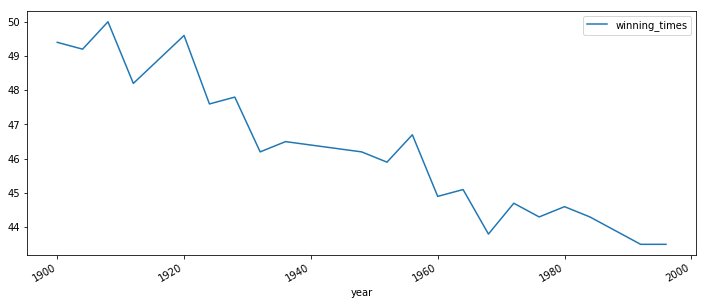

In [80]:
# your code here
data.plot();

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [84]:
# your code here
data_diff = data.diff(periods=1)
data_diff.dropna(inplace=True)

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


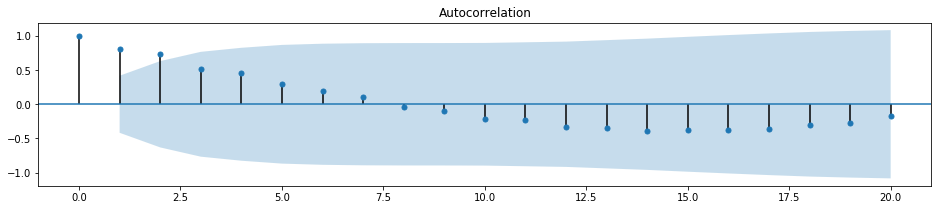

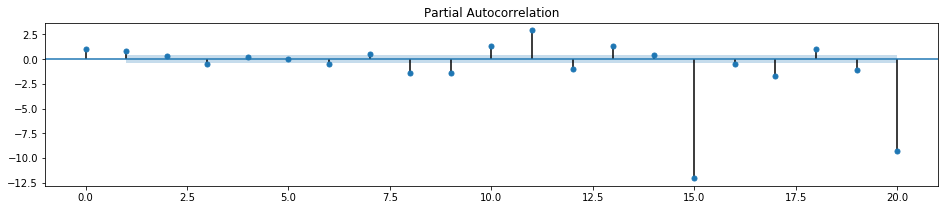

In [89]:
# Look at ACF and PACF
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(data,ax=ax, lags=20);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(data,ax=ax, lags=20);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [91]:
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(data, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   22
Model:                     ARMA(1, 0)   Log Likelihood                 -31.179
Method:                       css-mle   S.D. of innovations              0.957
Date:                Wed, 13 Mar 2019   AIC                             68.358
Time:                        14:42:44   BIC                             71.631
Sample:                             0   HQIC                            69.129
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  46.3138      1.736     26.682      0.000      42.912      49.716
ar.L1.winning_times     0.9168      0.081     11.372      0.000       0.759       1.075
                

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result eithe

In [96]:
# Try another one
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(data, order=(2,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   22
Model:                     ARMA(2, 0)   Log Likelihood                 -27.094
Method:                       css-mle   S.D. of innovations              0.776
Date:                Wed, 13 Mar 2019   AIC                             62.188
Time:                        14:45:37   BIC                             66.553
Sample:                             0   HQIC                            63.216
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  46.3756      2.490     18.627      0.000      41.496      51.255
ar.L1.winning_times     0.4135      0.167      2.479      0.023       0.087       0.740
ar.L2.winning_ti

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result eithe

## What is your final model? Why did you pick this model?

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.